# Preprocessing

In [2]:
import os
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from PIL import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)

# Parameters
datasetLocation = './dataset'  
num_samples_per_class = 1000
image_size = (28, 28)  

data = []
labels = []

classes = [str(i) for i in range(10)]  

for cls in classes:
    class_dir = os.path.join(datasetLocation, cls)
    all_images = os.listdir(class_dir)
    
    if len(all_images) < num_samples_per_class:
        raise ValueError(f"Not enough images in class {cls}")
    
    sampled_images = random.sample(all_images, num_samples_per_class)
    
    for img_name in sampled_images:
        img_path = os.path.join(class_dir, img_name)
        
        # Open the image file
        with Image.open(img_path) as img:
            # grayscale
            img = img.convert('L')
            
            img = img.resize(image_size, Image.LANCZOS)
            
            img_array = np.array(img, dtype=np.uint8)
            
            # Normalization
            img_array = img_array / 255  
            
            img_array = img_array.flatten()
            
            data.append(img_array)
            labels.append(int(cls))

data = np.array(data)
labels = np.array(labels)

data, labels = shuffle(data, labels, random_state=42)

# (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels)

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (8000, 784)
Training labels shape: (8000,)
Testing data shape: (2000, 784)
Testing labels shape: (2000,)


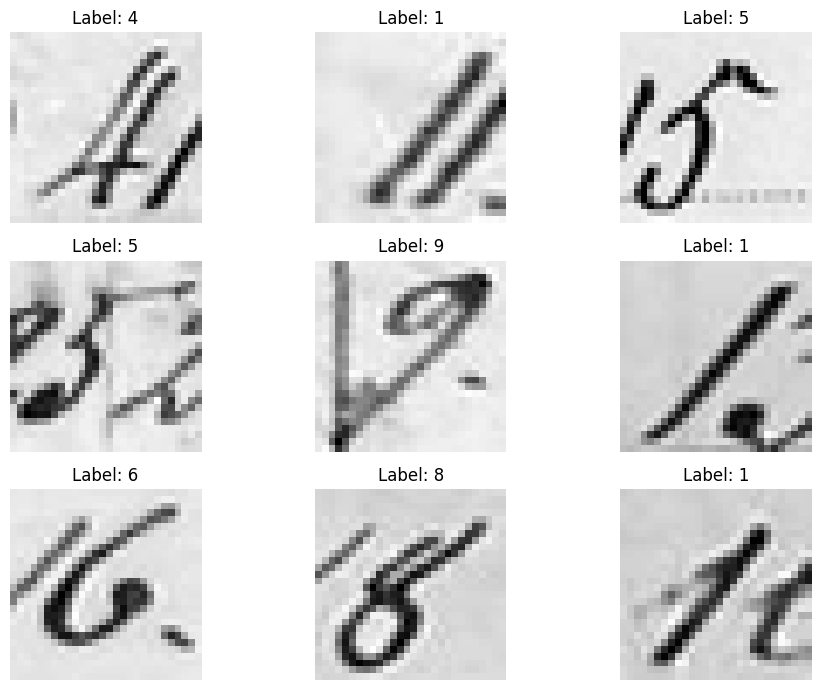

In [8]:
import matplotlib.pyplot as plt

def show_images_grid(images, labels, grid_size=(3, 3), figsize=(10, 7)):
    fig, axes = plt.subplots(*grid_size, figsize=figsize)
    axes = axes.flatten()
    
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img.reshape(28, 28), cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Show a few samples from the training set in a grid
num_images = 9  # Adjust based on grid_size (e.g., 2x3=6)
show_images_grid(X_train[:num_images], y_train[:num_images], grid_size=(3, 3))

# Naive Bayes


Cross-Validation Results (Naive Bayes):
Accuracy: 0.5119 ± 0.0094
Precision: 0.5476 ± 0.0102
Recall: 0.5119 ± 0.0094
F1-score: 0.5156 ± 0.0095

Test Set Performance (Naive Bayes):
Accuracy: 0.5250
Precision: 0.5547
Recall: 0.5250
F1-score: 0.5261

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       200
           1       0.34      0.71      0.46       200
           2       0.60      0.40      0.48       200
           3       0.55      0.67      0.60       200
           4       0.52      0.42      0.46       200
           5       0.60      0.36      0.45       200
           6       0.68      0.58      0.63       200
           7       0.63      0.51      0.56       200
           8       0.44      0.45      0.45       200
           9       0.60      0.53      0.56       200

    accuracy                           0.53      2000
   macro avg       0.55      0.53      0.53      2000
weighted a

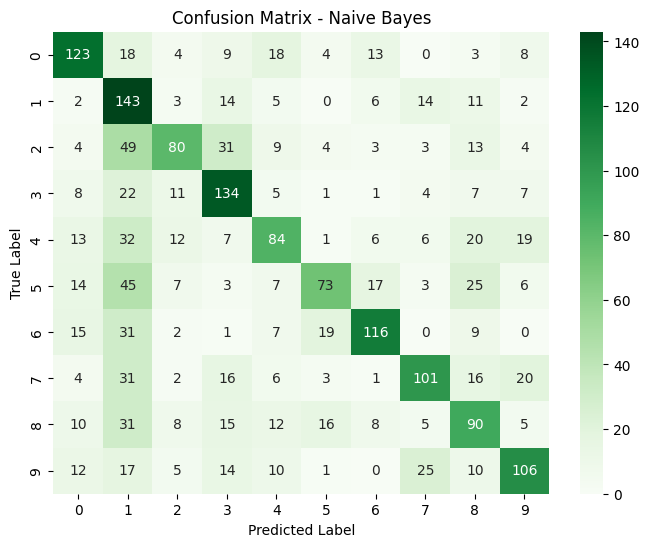

In [5]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_accuracy_scores = []
nb_precision_scores = []
nb_recall_scores = []
nb_f1_scores = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in skf.split(X_train, y_train):
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]
    
    nb_model.fit(X_cv_train, y_cv_train)
    
    # Predict on validation set
    y_pred = nb_model.predict(X_cv_val)
    
    # Calculate metrics
    nb_accuracy_scores.append(accuracy_score(y_cv_val, y_pred))
    nb_precision_scores.append(precision_score(y_cv_val, y_pred, average='macro', zero_division=0))
    nb_recall_scores.append(recall_score(y_cv_val, y_pred, average='macro', zero_division=0))
    nb_f1_scores.append(f1_score(y_cv_val, y_pred, average='macro', zero_division=0))

print("\nCross-Validation Results (Naive Bayes):")
print(f"Accuracy: {np.mean(nb_accuracy_scores):.4f} ± {np.std(nb_accuracy_scores):.4f}")
print(f"Precision: {np.mean(nb_precision_scores):.4f} ± {np.std(nb_precision_scores):.4f}")
print(f"Recall: {np.mean(nb_recall_scores):.4f} ± {np.std(nb_recall_scores):.4f}")
print(f"F1-score: {np.mean(nb_f1_scores):.4f} ± {np.std(nb_f1_scores):.4f}")

# Fit the model on the entire training set
nb_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_nb = nb_model.predict(X_test)

# Calculate performance metrics on test set
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
test_precision_nb = precision_score(y_test, y_test_pred_nb, average='macro', zero_division=0)
test_recall_nb = recall_score(y_test, y_test_pred_nb, average='macro', zero_division=0)
test_f1_nb = f1_score(y_test, y_test_pred_nb, average='macro', zero_division=0)
test_confusion_matrix_nb = confusion_matrix(y_test, y_test_pred_nb)

print("\nTest Set Performance (Naive Bayes):")
print(f"Accuracy: {test_accuracy_nb:.4f}")
print(f"Precision: {test_precision_nb:.4f}")
print(f"Recall: {test_recall_nb:.4f}")
print(f"F1-score: {test_f1_nb:.4f}")

print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_test_pred_nb, zero_division=0))

plt.figure(figsize=(8,6))
sns.heatmap(test_confusion_matrix_nb, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# MLP

In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam',learning_rate_init=0.001, max_iter=500, random_state=42)

acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []

for train_idx, val_idx in skf.split(X_train, y_train):
    X_train_cv = X_train[train_idx]
    X_val_cv = X_train[val_idx]
    y_train_cv = y_train[train_idx]
    y_val_cv = y_train[val_idx]

    mlp.fit(X_train_cv, y_train_cv)  

    y_pred = mlp.predict(X_val_cv)  

    acc_scores.append(accuracy_score(y_val_cv, y_pred))
    prec_scores.append(precision_score(y_val_cv, y_pred, average='macro', zero_division=0))
    rec_scores.append(recall_score(y_val_cv, y_pred, average='macro', zero_division=0))
    f1_scores.append(f1_score(y_val_cv, y_pred, average='macro', zero_division=0))

print("Cross-Validation Results (MLP):")
print("Accuracy: ", np.mean(acc_scores), "+-", np.std(acc_scores))
print("Precision: ", np.mean(prec_scores), "+-", np.std(prec_scores))
print("Recall: ", np.mean(rec_scores), "+-", np.std(rec_scores))
print("F1: ", np.mean(f1_scores), "+-", np.std(f1_scores))

mlp.fit(X_train, y_train)

y_test_pred = mlp.predict(X_test)

test_acc =accuracy_score(y_test, y_test_pred)
test_prec =precision_score(y_test, y_test_pred, average='macro', zero_division=0)
test_rec =recall_score(y_test, y_test_pred, average='macro', zero_division=0)
test_f1 =f1_score(y_test, y_test_pred, average='macro', zero_division=0)
test_cm =confusion_matrix(y_test, y_test_pred)

print("Test Results (MLP):")
print("Accuracy:", test_acc)
print("Precision:", test_prec)
print("Recall:", test_rec)
print("F1:", test_f1)

print("Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))


plt.figure()
sns.heatmap(test_cm,annot=True,cmap="Purples",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

scaler =MinMaxScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

param_grid={'hidden_layer_sizes':[(128,64),(256,128)],'activation':['relu','tanh'],'solver':['adam','sgd'],'learning_rate_init':[0.001,0.005,0.01],'max_iter':[2000],}

mlp = MLPClassifier(random_state=42,early_stopping=True)

grid_search =GridSearchCV(estimator=mlp,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters :  {grid_search.best_params_}")


In [ ]:

mlp_best = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(256, 128),
    learning_rate_init=0.001,
    max_iter=2000,
    solver='adam',
    random_state=42
)
mlp_best.fit(X_train, y_train)
y_test_pred = mlp_best.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Accuracy :  {(accuracy_score(y_test,y_test_pred)*100):.4f} %")
print("\nClassification Report:")
print(classification_report(y_test,y_test_pred))

import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix =confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix - Best MLP Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Linear Regression Model

In [8]:
import os
import numpy as np
from PIL import Image
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* **Implement One-vs-All strategy**

In [9]:
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)

* **Train a Linear Regression model for each class**

In [10]:
def train_ova_models(X, y_binarized):
    models = []
    for i in range(y_binarized.shape[1]):
        model = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', LinearRegression())
        ])
        model.fit(X, y_binarized[:, i])
        models.append(model)
    return models

ova_models = train_ova_models(X_train, y_train_binarized)

*  **Predict probabilities for each class on the test set**



In [11]:
test_predictions = []

for model in ova_models:
    pred = model.predict(X_test)
    test_predictions.append(pred)

In [12]:
test_predictions = np.array(test_predictions)

* **Take the class with the highest predicted value**

In [13]:
y_test_pred_lr = np.argmax(test_predictions, axis=0)
y_test_pred_lr = lb.classes_[y_test_pred_lr]

*  **Calculate performance metrics**

In [14]:
Results = {
    "Accuracy": accuracy_score(y_test, y_test_pred_lr),
    "Precision": precision_score(y_test, y_test_pred_lr, average='macro', zero_division=0),
    "Recall": recall_score(y_test, y_test_pred_lr, average='macro', zero_division=0),
    "F1-score": f1_score(y_test, y_test_pred_lr, average='macro', zero_division=0),
    "Confusion Matrix": confusion_matrix(y_test, y_test_pred_lr)
}


In [15]:
print("\n Performance Metrics for Linear Regression (One-vs-All):")
for result, value in Results.items():
    if result != "Confusion Matrix":
        print(f"   {result}: {value:.4f}")
print("==========================================================")


 Performance Metrics for Linear Regression (One-vs-All):
   Accuracy: 0.6730
   Precision: 0.6714
   Recall: 0.6730
   F1-score: 0.6703


* **Display classification report**

In [16]:
print("\nClassification Report (Linear Regression OvA):")
print(classification_report(y_test, y_test_pred_lr, zero_division=0))
print("==============================================================")


Classification Report (Linear Regression OvA):
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       200
           1       0.68      0.77      0.72       200
           2       0.76      0.71      0.73       200
           3       0.71      0.75      0.73       200
           4       0.66      0.66      0.66       200
           5       0.66      0.61      0.64       200
           6       0.68      0.78      0.73       200
           7       0.59      0.61      0.60       200
           8       0.62      0.49      0.55       200
           9       0.64      0.57      0.60       200

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000



* **Plot confusion matrix**

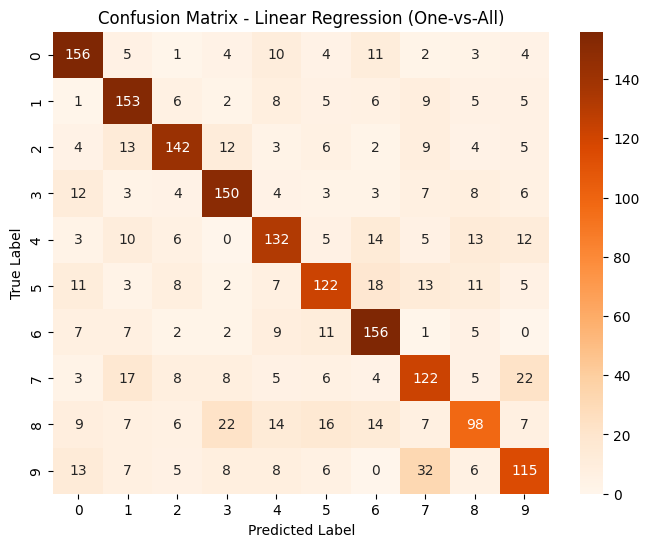

In [17]:
conf_matrix=Results["Confusion Matrix"]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title("Confusion Matrix - Linear Regression (One-vs-All)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

* **Discussing failed cases**

In [18]:
failure_cases = np.where(y_test != y_test_pred_lr)[0]
print("\nDiscussion of Failure Cases:")
print(f"Number of misclassified samples: {len(failure_cases)}")


Discussion of Failure Cases:
Number of misclassified samples: 654


In [19]:
print("Examples of misclassified samples:")
for idx in failure_cases[:5]:
    print(f"Sample Index: {idx}, True Label: {y_test[idx]}, Predicted Label: {y_test_pred_lr[idx]}")

Examples of misclassified samples:
Sample Index: 2, True Label: 3, Predicted Label: 7
Sample Index: 3, True Label: 2, Predicted Label: 1
Sample Index: 4, True Label: 2, Predicted Label: 5
Sample Index: 5, True Label: 7, Predicted Label: 9
Sample Index: 11, True Label: 1, Predicted Label: 5



Displaying first 3 misclassified images:


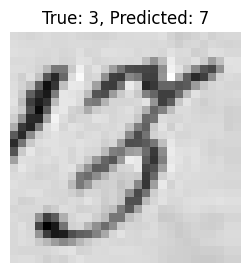

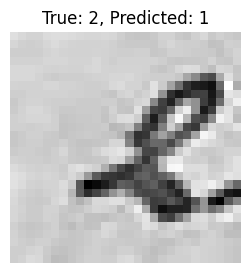

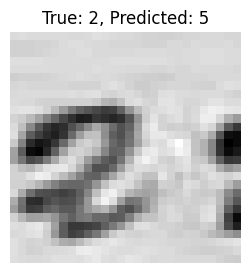

In [20]:
print("\nDisplaying first 3 misclassified images:")
for i, idx in enumerate(failure_cases[:3]):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_test_pred_lr[idx]}")
    plt.axis('off')
    plt.show()

* **Setting up Grid Search to modify Hyperparameters**

In [21]:
param_grid = {
            'regressor__alpha': [0.1, 1, 10, 100],
            'regressor__fit_intercept': [True, False],
        }

In [22]:
optimized_ova_models = []
for i in range(y_train_binarized.shape[1]):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Ridge())
    ])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train_binarized[:, i])
    best_model = grid_search.best_estimator_
    optimized_ova_models.append(best_model)
    print(f"Best Parameters for class {i}: {grid_search.best_params_}")

c:\Users\LOQ\Desktop\ml_project\ML_Project\venv\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters for class 0: {'regressor__alpha': 0.1, 'regressor__fit_intercept': True}


c:\Users\LOQ\Desktop\ml_project\ML_Project\venv\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters for class 1: {'regressor__alpha': 0.1, 'regressor__fit_intercept': True}


c:\Users\LOQ\Desktop\ml_project\ML_Project\venv\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters for class 2: {'regressor__alpha': 0.1, 'regressor__fit_intercept': True}


c:\Users\LOQ\Desktop\ml_project\ML_Project\venv\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters for class 3: {'regressor__alpha': 0.1, 'regressor__fit_intercept': True}


c:\Users\LOQ\Desktop\ml_project\ML_Project\venv\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters for class 4: {'regressor__alpha': 0.1, 'regressor__fit_intercept': True}


c:\Users\LOQ\Desktop\ml_project\ML_Project\venv\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters for class 5: {'regressor__alpha': 0.1, 'regressor__fit_intercept': True}


c:\Users\LOQ\Desktop\ml_project\ML_Project\venv\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters for class 6: {'regressor__alpha': 0.1, 'regressor__fit_intercept': True}


KeyboardInterrupt: 

In [ ]:
optimized_test_predictions = np.array([model.predict(X_test) for model in optimized_ova_models])
y_test_pred_optimized = np.argmax(optimized_test_predictions, axis=0)
y_test_pred_optimized = lb.classes_[y_test_pred_optimized]

In [ ]:
Optimized_Results = {
    "Accuracy": accuracy_score(y_test, y_test_pred_optimized),
    "Precision": precision_score(y_test, y_test_pred_optimized, average='macro', zero_division=0),
    "Recall": recall_score(y_test, y_test_pred_optimized, average='macro', zero_division=0),
    "F1-score": f1_score(y_test, y_test_pred_optimized, average='macro', zero_division=0),
    "Confusion Matrix": confusion_matrix(y_test, y_test_pred_optimized)
}

In [ ]:
print("\nPerformance Metrics for Optimized Ridge Regression:")
for result, value in Optimized_Results.items():
    if result != "Confusion Matrix":
        print(f"   {result}: {value:.4f}")
print("==========================================================")

In [ ]:
print("\nClassification Report (Optimized Ridge Regression):")
print(classification_report(y_test, y_test_pred_optimized, zero_division=0))
print("==============================================================")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(Optimized_Results["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title("Confusion Matrix - Optimized Ridge Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
